In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
path = r"C:\Users\ahamr\Desktop\Machine Learning\Data Sets"

In [3]:
weather_data = pd.read_csv(os.path.join(path, 'data_pca.csv'))

In [4]:
weather_data.head()

,Unnamed: 0,PCA1,PCA2
0,0,-5.627863,0.240022
1,1,-5.497621,0.395369
2,2,-5.559023,0.299921
3,3,-5.681382,0.443173
4,4,-5.017273,1.382281


In [5]:
weather_data = weather_data.drop(['Unnamed: 0'], axis=1)

In [6]:
weather_data.head()

,PCA1,PCA2
0,-5.627863,0.240022
1,-5.497621,0.395369
2,-5.559023,0.299921
3,-5.681382,0.443173
4,-5.017273,1.382281


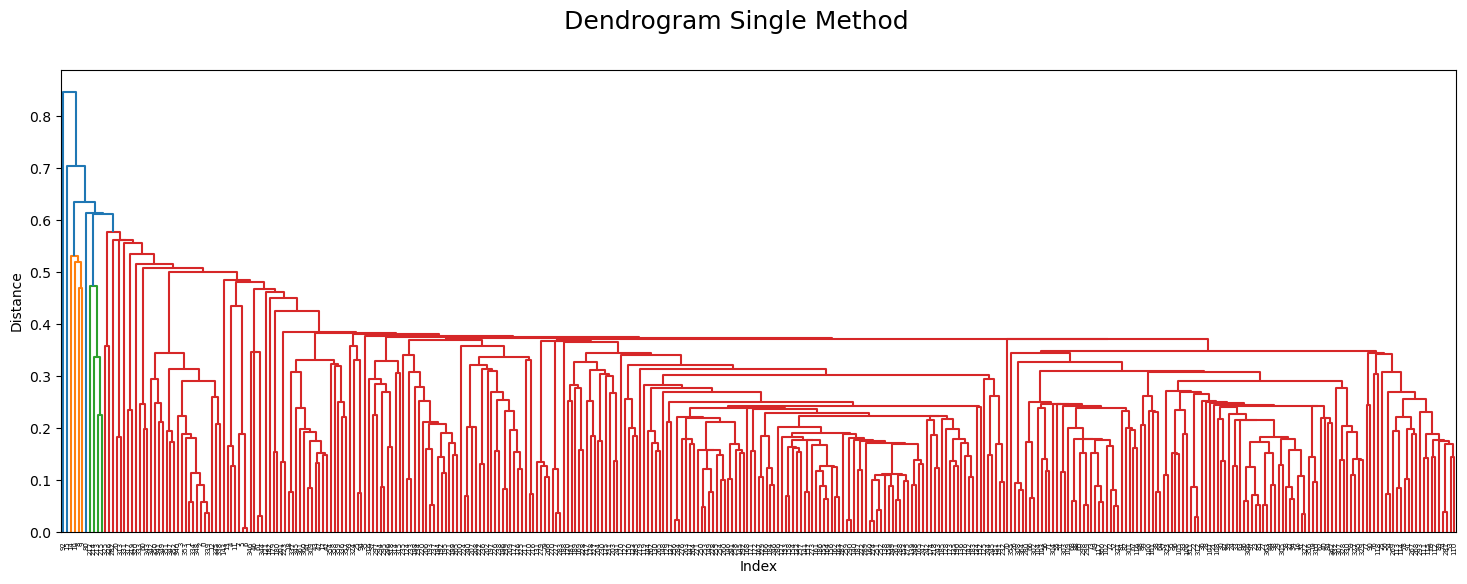

In [7]:
distance_single = linkage(weather_data.loc[:,['PCA1','PCA2']],
                         method="single")

plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

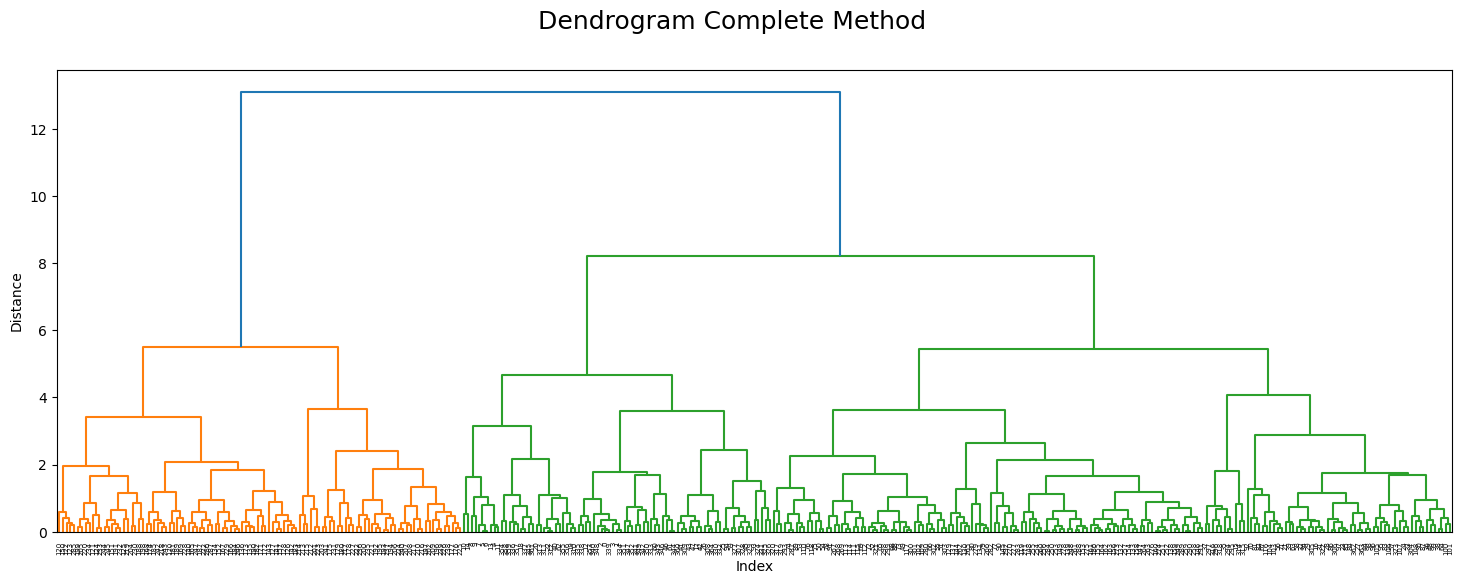

In [8]:
distance_complete = linkage(weather_data.loc[:,['PCA1','PCA2']],
                         method="complete")

plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

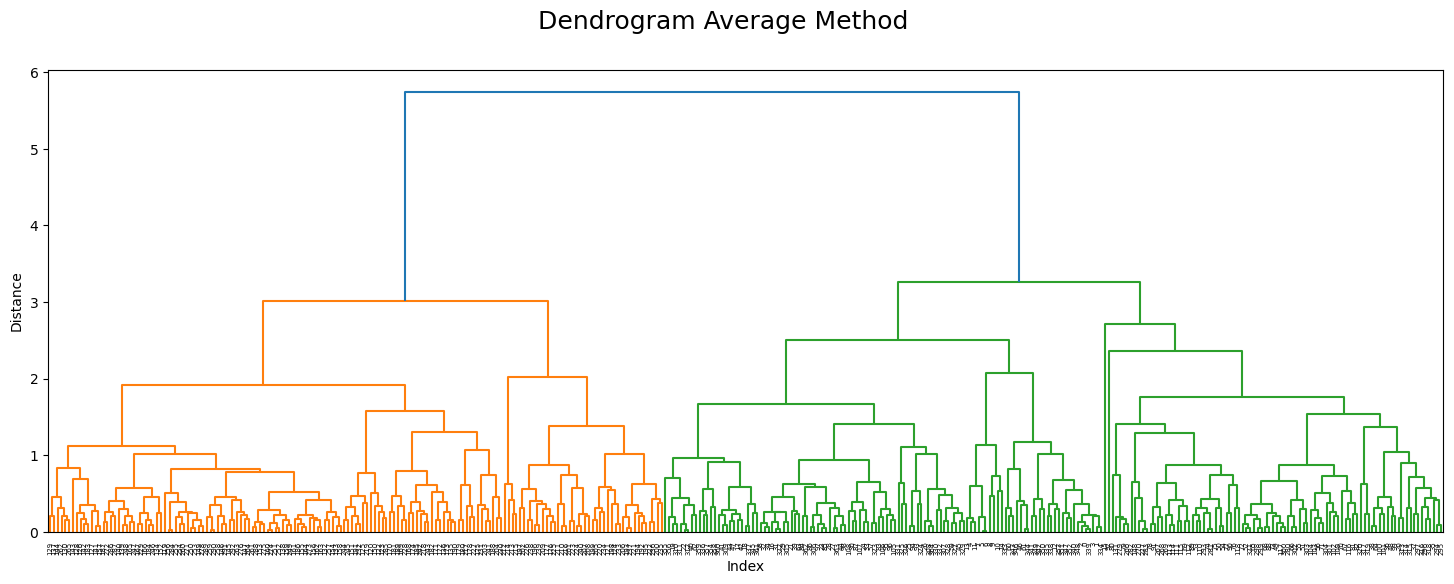

In [9]:
distance_average = linkage(weather_data.loc[:,['PCA1','PCA2']],
                         method="average")

plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

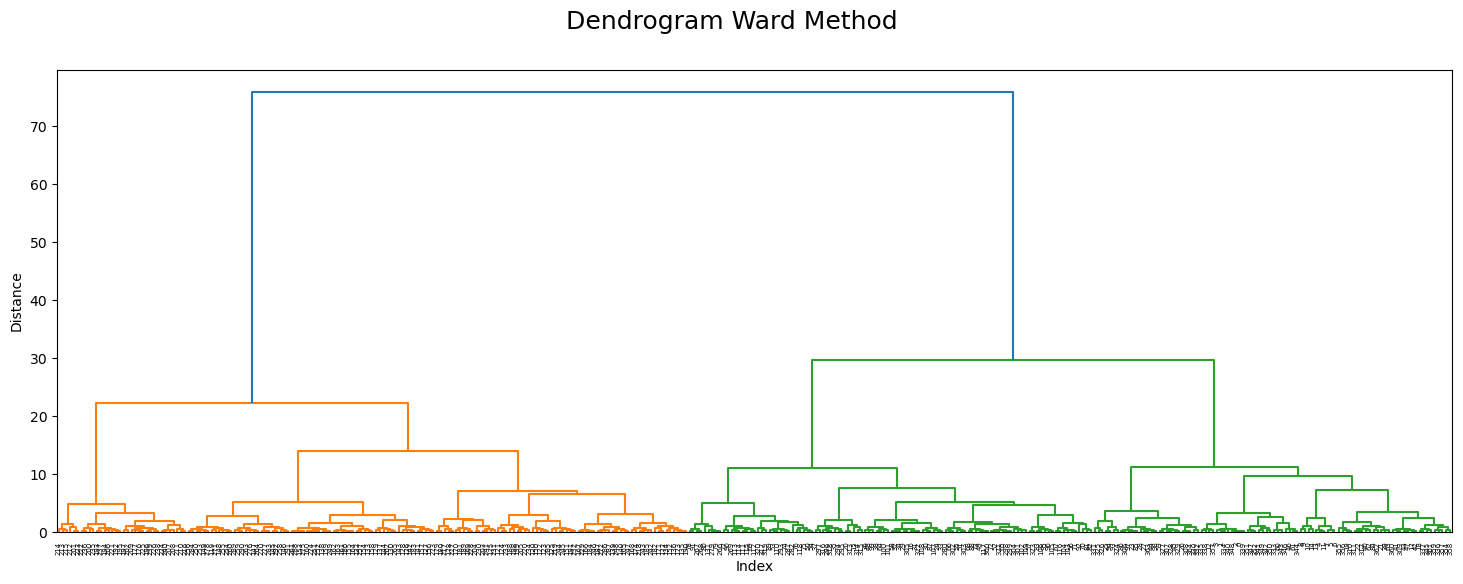

In [10]:
distance_ward = linkage(weather_data.loc[:,['PCA1','PCA2']],
                         method="ward")

plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

In [11]:
pleasant_data = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [12]:
pleasant_data

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
#Reducing dataset to a decade
pleasant_data = pleasant_data[pleasant_data['DATE'].astype(str).str.contains('1990')] 
pleasant_data

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,19900101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,19900102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,19900103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,19900104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,19900105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,19901227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11319,19901228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11320,19901229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11321,19901230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
pleasant_data = pleasant_data.reset_index(drop=True) 

In [15]:
pleasant_data

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19900101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19900102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19900103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19900104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19900105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,19901227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,19901228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,19901229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
363,19901230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Check if "index" exists in both dataframes
if "index" not in pleasant_data.columns:
    # Add a new "index" column based on row number (assuming a numeric index)
    pleasant_data["index"] = pleasant_data.index

In [17]:
weather_data["index"] = weather_data.index

In [18]:
# Merge the dataframes based on index
merged_data = weather_data.merge(pleasant_data, on=["index"])

In [19]:
# Separate features and target variable
X = merged_data[["PCA1", "PCA2"]]
y = merged_data[["BASEL_pleasant_weather", "BELGRADE_pleasant_weather", "BUDAPEST_pleasant_weather", "DEBILT_pleasant_weather", 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather','KASSEL_pleasant_weather','LJUBLJANA_pleasant_weather','MAASTRICHT_pleasant_weather','MADRID_pleasant_weather','MUNCHENB_pleasant_weather','OSLO_pleasant_weather','SONNBLICK_pleasant_weather','STOCKHOLM_pleasant_weather','VALENTIA_pleasant_weather']]

In [20]:
# Access existing cluster labels (directly as PCA1 and PCA2)
existing_clusters = merged_data[["PCA1", "PCA2"]]  

In [21]:
# Check cluster correspondence with pleasant weather labels
for i in range(merged_data.shape[0]):  # Iterate through each data point
    point_clusters = existing_clusters.iloc[i]  # Get PCA1 and PCA2 for current point
    point_labels = y.iloc[i]  # Get pleasant weather labels for current point
    pleasant_proportion = point_labels.sum() / len(point_labels)  # Calculate proportion
    print(f"PCA1: {point_clusters[0]}, PCA2: {point_clusters[1]}: Pleasant proportion = {pleasant_proportion:.4f}")


PCA1: -5.627862711634809, PCA2: 0.2400215110680583: Pleasant proportion = 0.0000
PCA1: -5.497620883581376, PCA2: 0.3953685470401893: Pleasant proportion = 0.0000
PCA1: -5.559022641035178, PCA2: 0.2999211783226417: Pleasant proportion = 0.0000
PCA1: -5.681381916466221, PCA2: 0.4431725353978817: Pleasant proportion = 0.0000
PCA1: -5.017273266686149, PCA2: 1.3822812004967795: Pleasant proportion = 0.0000
PCA1: -5.265655811732591, PCA2: 1.8560396127015248: Pleasant proportion = 0.0000
PCA1: -5.259822409489434, PCA2: 1.8581455742226256: Pleasant proportion = 0.0000
PCA1: -5.361157184419513, PCA2: 2.017490282607767: Pleasant proportion = 0.0000
PCA1: -4.768123132643928, PCA2: 2.2589776936087773: Pleasant proportion = 0.0000
PCA1: -4.430931819456572, PCA2: 1.933400095789375: Pleasant proportion = 0.0000
PCA1: -4.147013050740528, PCA2: 2.368169133257465: Pleasant proportion = 0.0000
PCA1: -5.073276574263541, PCA2: 1.27018943016859: Pleasant proportion = 0.0000
PCA1: -5.129882226284958, PCA2: 0

C:\Users\ahamr\AppData\Local\Temp\ipykernel_16324\4291950823.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"PCA1: {point_clusters[0]}, PCA2: {point_clusters[1]}: Pleasant proportion = {pleasant_proportion:.4f}")


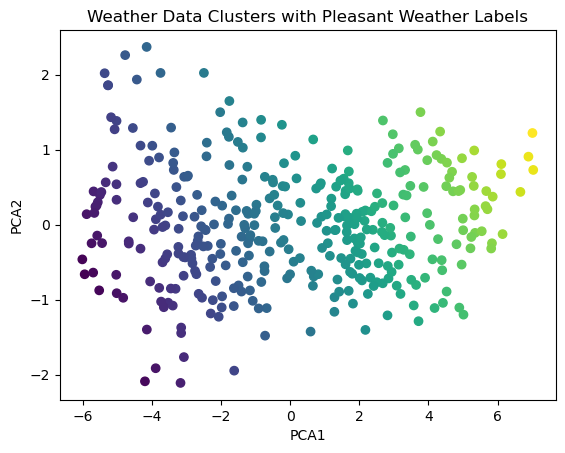

In [22]:
# Create scatter plot with colors indicating PCA1 and PCA2 values
plt.scatter(merged_data["PCA1"], merged_data["PCA2"], c=merged_data["PCA1"] + merged_data["PCA2"])  # Combine PCA1 and PCA2 for coloring
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Weather Data Clusters with Pleasant Weather Labels")
plt.show()

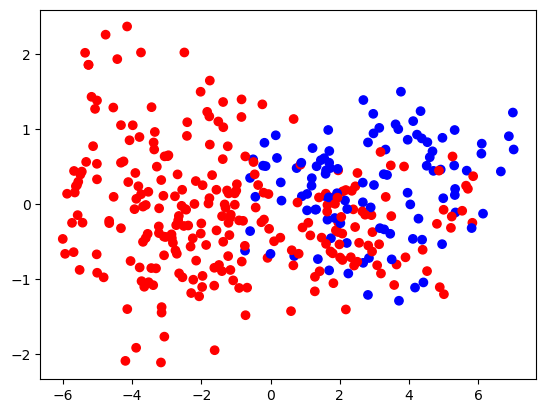

In [23]:
# Define a dictionary to map label values to colors
label_colors = {0: "red", 1: "blue"}  

# Create a list of colors based on labels
colors = [label_colors[label] for label in merged_data["BASEL_pleasant_weather"]] 

# Create scatter plot with colors based on labels
plt.scatter(merged_data["PCA1"], merged_data["PCA2"], c=colors)
plt.show()

C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([<matplotlib.axis.XTick at 0x2d3127f7910>,
 [Text(0, 0, '-6.006774726871623'),
  Text(40, 0, '-4.141634519788365'),
  Text(80, 0, '-3.078343168646266'),
  Text(120, 0, '-1.9631807571696127'),
  Text(149, 0, '-1.1893860859072949')])

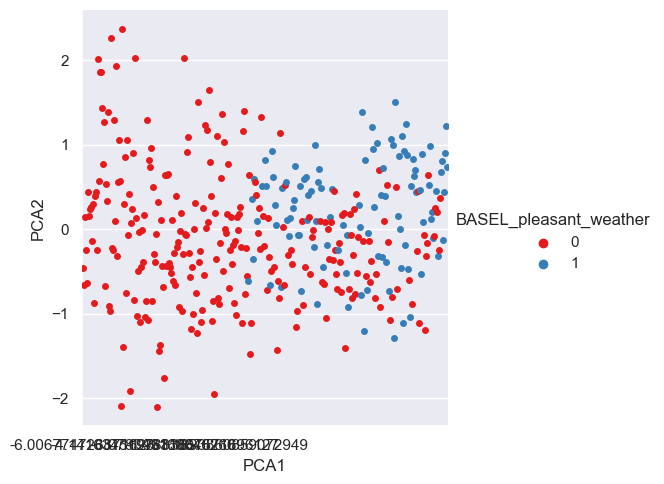

In [25]:
#PLot the two components, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="BASEL_pleasant_weather", data=merged_data)
plt.xticks([0, 40, 80, 120, 149])

### Based on the plot observations, it seems like there is a relationship between the clusters and the pleasant weather labels. 